<a href="https://colab.research.google.com/github/wheemin-2/24-2-ESAA/blob/main/YB_11_15_%EC%84%B8%EC%85%98_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_%ED%9A%8C%EA%B7%802.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 규제 선형 회귀 모델/ 회귀 트리**
- 릿지 회귀모델 및 회귀 트리를 이용하여 전복의 나이를 예측해 보세요.

- 전복의 ‘성별’, ‘키’, ‘지름’, ‘높이’, ‘전체무게’, ‘몸통무게’, ‘내장무게’, ‘껍질무게’를 이용해 ‘껍질의 고리수’를 예측한 뒤, **예측된 ‘껍질의 고리수’에 1.5를 더하면 전복의 나이**가 됩니다.

In [1]:
# 기본 모듈 불러오기
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

### 1) 데이터 불러오기 및 데이터 선택

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 데이터 로드
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ESAA/data/abalone.csv")

# 성별 M은 Male, F는 Female, I는 Infant 이므로 따로 열 만들기
for label in "MFI":
    data[label] = data["Sex"] == label
data.drop('Sex', axis=1, inplace=True)

# X,y 데이터 선택
y = data.Rings.values
data.drop('Rings', axis=1, inplace=True)

X = data.values.astype(float)

## 2) train/test 분리
: 테스트 셋과 데이터 셋을 7:3 비율로 분리하세요.

In [4]:
# 필요한 모듈 불러오기
from sklearn.model_selection import train_test_split

In [5]:
# train과 test set 분리 (train:test = 7:3 비율로)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 3) 릿지 모델을 이용한 모델링
: 릿지 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

 3-1) 릿지모델 생성, 교차검증, 평가에 필요한 모듈을 불러오세요.

In [14]:
#필요한 모듈 불러오기
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np

3-2) 릿지 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요. 릿지 모델 생성 시  alpha는 0.3으로 설정합니다. (교차 검증 하지 않습니다.)

In [10]:
#릿지모델 생성 및 훈련
ridge_reg = Ridge(alpha=0.3)
ridge_reg.fit(X_train, y_train)

#예측값 구하기
pred = ridge_reg.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
pred_age = pred + 1.5

#MSE와 RMSE구하기
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(mse, rmse)

4.714581712308872 2.171308755637685


3-3) 교차검증을 이용하여 0, 0.1, 1, 10, 100 중  모델 성능이 가장 좋게 나오는 (rmse가 최소가 되는) alpha를 구하세요.

In [11]:
# 주어진 alpha
alphas=[0, 0.1, 1, 10, 100]

In [16]:
#alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas:
    model = Ridge(alpha=alpha)
    #cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
    neg_mse = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_avg = np.mean(np.sqrt(-1*neg_mse))
    print('alpha가 {0}일 때 5 폴드 평균 RMSE는 {1:.3f}'.format(alpha, rmse_avg))


alpha가 0일 때 5 폴드 평균 RMSE는 2.227
alpha가 0.1일 때 5 폴드 평균 RMSE는 2.221
alpha가 1일 때 5 폴드 평균 RMSE는 2.217
alpha가 10일 때 5 폴드 평균 RMSE는 2.350
alpha가 100일 때 5 폴드 평균 RMSE는 2.616


## 4) XGBRegressor을 이용한 모델링
: XGBRegressor 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

4-1) XGBRegressor 훈련, 평가에 필요한 모듈을 불러오세요.

In [17]:
# 필요한 모듈 임포트
from xgboost import XGBRegressor

4-2) XGBregressor 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요.

In [19]:
#모델 생성 및 훈련
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)

#예측값 구하기
pred2 = xgb_reg.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
pred_age2 = pred2 + 1.5

#MSE와 RMSE 구하기
mse = mean_squared_error(y_test, pred2)
rmse = np.sqrt(mse)
print('MSE : {0:.3F}, RMSE : {1:.3F}'.format(mse, rmse))

MSE : 5.031, RMSE : 2.243


4-3) 생성한 모델의 피처 중요도를 시각화해보세요.

<Axes: title={'center': 'feature importances'}, ylabel='None'>

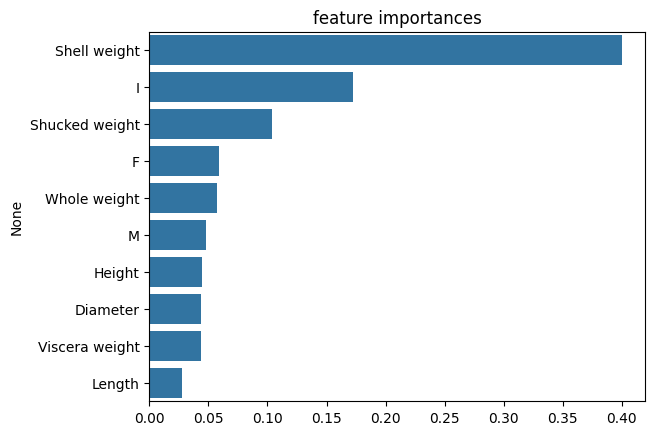

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

features = pd.Series(data=xgb_reg.feature_importances_, index=data.columns)
features_sort = features.sort_values(ascending=False)

plt.title('feature importances')
sns.barplot(x=features_sort.values, y=features_sort.index)


---

# **2. 로지스틱 회귀분석**
load_wine() 함수를 이용하여 와인 데이터를 다항분류하는 로지스틱 회귀모델을 생성하세요.

In [30]:
# 필요한 모듈 불러오기
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## 1) 데이터 불러오기 및 변수 선택

In [31]:
wine = load_wine()

wine_x = wine.data # x변수
wine_y = wine.target # y변수

## 2) train/test 셋 분리

In [33]:
x_train, x_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.3, random_state=123)

print(x_train.shape, y_train.shape)

(124, 13) (124,)


## 3) 로지스틱 회귀모델을 이용한 모델링

3-1) 로지스틱 회귀모델을 생성하여 훈련하세요.

In [34]:
# 모델 생성/훈련
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

3-2) 회귀 모델의 기울기와 절편을 구하세요.

In [37]:
#기울기
lr.coef_

array([[-1.99751386e-01,  3.65451311e-01,  1.49472420e-01,
        -1.88027207e-01, -2.28494295e-02,  1.95456870e-01,
         4.66702169e-01, -1.66796937e-02,  8.23898772e-02,
         6.75013601e-02, -1.92622133e-02,  2.94916328e-01,
         7.42521868e-03],
       [ 5.96476718e-01, -7.88674281e-01, -1.26181715e-01,
         2.12254366e-01, -1.13503885e-02,  3.15786530e-01,
         3.55148678e-01,  3.34676039e-02,  2.79036200e-01,
        -1.17202715e+00,  2.61166174e-01,  4.64732433e-01,
        -8.33633942e-03],
       [-3.96725333e-01,  4.23222970e-01, -2.32907053e-02,
        -2.42271599e-02,  3.41998181e-02, -5.11243400e-01,
        -8.21850846e-01, -1.67879102e-02, -3.61426078e-01,
         1.10452579e+00, -2.41903960e-01, -7.59648761e-01,
         9.11120744e-04]])

In [36]:
#절편
lr.intercept_

array([-0.04177844,  0.09551062, -0.05373218])

3-3) 모델의 정확도를 구하세요.

In [38]:
#모델의 예측값 구하기
pred = lr.predict(x_test)

#모델의 정확도 구하기
metrics.accuracy_score(pred, y_test)


0.9629629629629629

**추가 참고사항**

로지스틱 회귀는 다중 클래스 분류 문제에서 각 클래스를 구별하기 위한 여러 개의 "이진" 분류 문제로 분할합니다.

> load_wine() 데이터셋은 3개의 클래스(와인 종류)에 대해 분류하는 문제이므로, lr.coef_는 각 클래스마다 하나의 회귀 계수 벡터를 갖습니다.

In [47]:
# 타겟값 클래스 3개
pd.Series(data=wine_y).value_counts()

,count
1,71
0,59
2,48
